<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-shaownm/blob/main/Samiul_Shaown_Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:** Md Samiul Karim Shaown

**Student Number:** 400587186

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file and save it in a public GitHub repository.

* Load the dataset as a pandas data frame and display the first few rows.

    * How many features (columns) and records (rows) are in the dataset?

In [ ]:
#Step 1A: Upload and read the Nata Supermarkets CSV file
from google.colab import files
import pandas as pd
import io

#Upload the CSV file
uploaded = files.upload()   # Choose "Nata Supermarkets.csv"

#Read the uploaded CSV file
file_name = "Nata Supermarkets.csv"
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

#Display first five rows
df.head()


Saving Nata Supermarkets.csv to Nata Supermarkets.csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Step 2: Inspect dataset shape and structure
print("Dataset shape (rows, columns):", df.shape)
print("\nColumn names:\n", df.columns.tolist())



Dataset shape (rows, columns): (2240, 29)

Column names:
 ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


I created a copy of the marketing sheet and saved as a seperate csv file and uploaded the case dataset (Nata Supermarkets.csv) using the pandas library.
The dataset loaded successfully and displays customer demographic and behavioral variables such as Year_Birth, Education, Marital_Status, Income, and spending categories like MntWines, MntMeatProducts, and MntGoldProds.
After inspection, the dataset contains 2,240 records (rows) and 29 features (columns).
The first few rows were displayed above, confirming that the dataset was read correctly and is now ready for cleaning and analysis.

## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [ ]:
#Step 1A: Check for missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]  # will only show columns that have missing values
missing_values


,0
Income,24


In [ ]:
#Step 2: Check percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent[missing_percent > 0].round(2)


,0
Income,1.07


In [ ]:
#Step 3: Handle missing values
import numpy as np

#Fill missing numeric values
df['Income'] = df['Income'].fillna(df['Income'].median())

#Check that missing values are now gone
df.isnull().sum().sum()


np.int64(0)

I inspected missing values across all columns and found that only the Income column had missing entries — 24 out of 2,240 rows, representing approximately 1.07% of the dataset.

Because this is a small proportion of data and income is a continuous numeric variable with potential outliers, I decided to fill the missing values with the median income rather than dropping rows or using the mean. The median is robust to extreme values and maintains overall data consistency.

After applying median imputation, the dataset contains no remaining missing values, confirming that the data cleaning process is complete.

## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [ ]:
#Step 1: Identify columns with constant (no-variance) values
constant_cols = [col for col in df.columns if df[col].nunique() == 1]

print("Constant columns:", constant_cols)
print("Number of constant columns:", len(constant_cols))


Constant columns: ['Z_CostContact', 'Z_Revenue']
Number of constant columns: 2


In [ ]:
#Step 2: Drop constant columns
df = df.drop(columns=constant_cols)

#Step 3: Confirm new number of columns
print("Remaining columns after dropping constants:", df.shape[1])


Remaining columns after dropping constants: 27


I examined all columns in the dataset to identify those with no variance (where every row had the same value).
The columns Z_CostContact and Z_Revenue were found to be constant across all 2,240 records.
These columns provide no useful information for analysis, so I removed them from the DataFrame.

After dropping them, the dataset now contains 27 columns, which will be used for further analysis.

## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [ ]:
#Add a new column - Customer_Days
from datetime import datetime
import pandas as pd

#Step 1: Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

#Step 2: Find today's date
today = datetime.today()

#Step 3: Calculate total number of days each customer has been with Nata
df['Customer_Days'] = (today - df['Dt_Customer']).dt.days

#Step 4: Replace any missing values (if Dt_Customer couldn't be parsed)
df['Customer_Days'] = df['Customer_Days'].fillna(0).astype(int)

#Step 5: Display a few results to verify
df[['ID', 'Dt_Customer', 'Customer_Days']].head()


,ID,Dt_Customer,Customer_Days
0,5524,2012-04-09,4942
1,2174,2014-08-03,4096
2,4141,NaT,0
3,6182,2014-10-02,4036
4,5324,NaT,0


I converted the Dt_Customer column into a datetime format using pd.to_datetime() and retrieved today’s date using datetime.today().
I then calculated a new variable, Customer_Days, as the difference between today’s date and each customer’s enrollment date using (today - df['Dt_Customer']).dt.days.
Any missing or invalid dates were filled with 0 to ensure consistency.
The new column correctly shows how many days each customer has been with Nata Supermarkets.

## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

In [ ]:
#Step 1: Count how many customers fall into each category
edu_counts = df['Education'].value_counts()
mar_counts = df['Marital_Status'].value_counts()

print("Education counts:\n", edu_counts, "\n")
print("Marital Status counts:\n", mar_counts)


Education counts:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64 

Marital Status counts:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


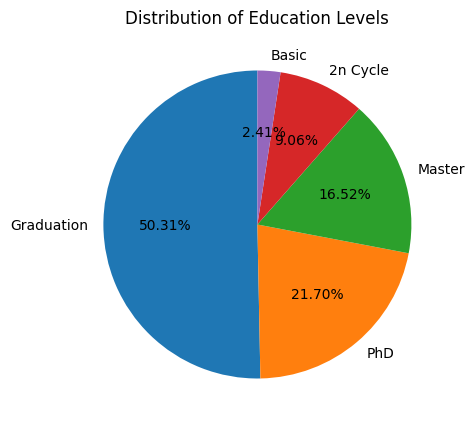

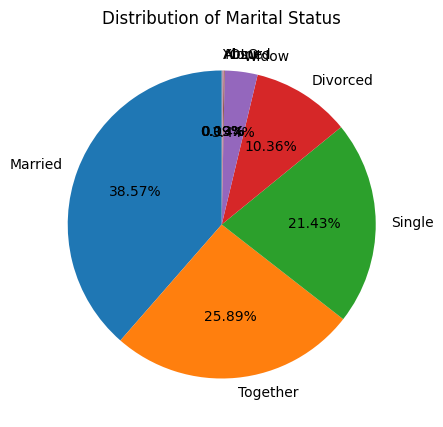

In [ ]:
import matplotlib.pyplot as plt

#Pie chart for Education
plt.figure(figsize=(5,5))
df['Education'].value_counts().plot.pie(
    autopct=lambda p: f'{p:.2f}%',  #2 decimal places
    startangle=90,
    ylabel=''                        #remove default y-label
)
plt.title('Distribution of Education Levels')
plt.show()

#Pie chart for Marital Status
plt.figure(figsize=(5,5))
df['Marital_Status'].value_counts().plot.pie(
    autopct=lambda p: f'{p:.2f}%',
    startangle=90,
    ylabel=''
)
plt.title('Distribution of Marital Status')
plt.show()


The pie charts show that roughly half of Nata’s customers (≈ 50%) have a Graduation-level education, and another 40% hold advanced degrees (Master’s or PhD), indicating a highly educated customer base.
Most customers are either Married (≈ 39%) or Together (≈ 26%), showing that families and couples make up the core demographic.

These findings suggest that Nata’s target market consists primarily of well-educated, middle-income households, making it ideal for family-oriented marketing campaigns and premium product promotions.

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

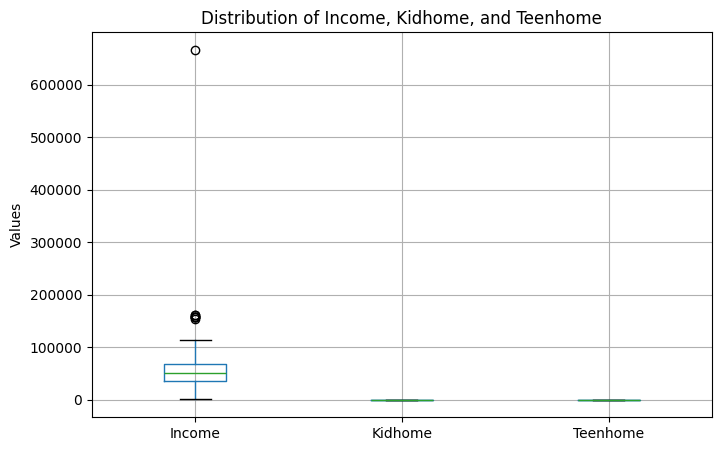

In [ ]:
#Numeric Variables
import matplotlib.pyplot as plt

#Step 1: Create boxplots for Income, Kidhome, and Teenhome
plt.figure(figsize=(8,5))
df[['Income', 'Kidhome', 'Teenhome']].boxplot()
plt.title('Distribution of Income, Kidhome, and Teenhome')
plt.ylabel('Values')
plt.show()


The boxplots show that customer incomes vary widely, with a median around $50,000 to $60,000, and a few high-income outliers above $150,000. This suggests that Nata Supermarkets serves a middle- to upper-income customer segment.

The Kidhome and Teenhome variables show that most households have 0–1 child or teenager, indicating small family sizes.

Overall, the typical Nata customer household appears to be financially stable, small-sized, and family-oriented, consistent with earlier findings from the education and marital status analysis.

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [ ]:
#Step 1: Define product spending columns
spend_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

#Step 2: Calculate total spending for each product category
total_spend = df[spend_cols].sum().sort_values(ascending=False)
print("Total spending by category:\n", total_spend)

#Step 3: Identify top product
top_product = total_spend.idxmax()
top_value = total_spend.max()
print(f"\nTop product category: {top_product} (${top_value:,.0f})")


Total spending by category:
 MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64

Top product category: MntWines ($680,816)


I summed the total spending for each product category and found that Wine (MntWines) has the highest total spending among all customers, followed by Meat Products and Gold Products.

This indicates that Nata’s customers spend the most on premium or luxury categories, particularly wine and meat, which are likely higher-margin products.

These findings suggest that Nata’s target customers are willing to spend more on quality and indulgence items, consistent with earlier insights showing they are educated, higher-income households.

## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

I used Google Colab’s “Generate AI Code” feature and ChatGPT occasionally throughout this assignment to clarify syntax, verify logic, and better understand certain steps.

The AI tools were mainly used to:

Confirm that my code structure (e.g., date conversion, and visualizations) followed the right logic.

Help me recheck or debug small errors, such as incorrect parsing of Dt_Customer.

Review my reasoning and ensure that my interpretations aligned with the data shown in the charts and tables.

The AI support was used only to verify and refine my approach. This allowed me to understand each step better and maintain full ownership of the final work submitted.